In [1]:
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import pandas as pd

**bullet 1:**

In [2]:
df= pd.read_csv (r'heart.csv')

In [3]:
#features = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].to_numpy()
features = df[[ 'thalachh','oldpeak']].to_numpy()
outcome = df['output'].to_numpy()

In [4]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=2, random_state=101)
y_pred = kmeans.fit_predict(features)

In [69]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [70]:
y_pred is kmeans.labels_

True

In [71]:
centers=kmeans.cluster_centers_
kmeans.cluster_centers_

array([[126.20338983,   1.60084746],
       [164.6       ,   0.68162162]])

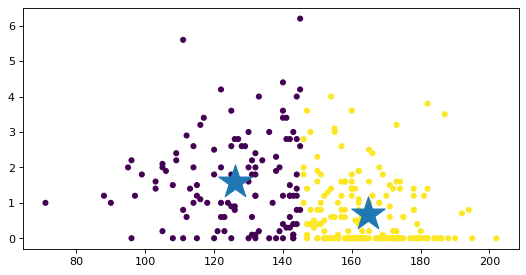

In [72]:
#plt.scatter(features[:, 0], features[:, 1], c=outcome, s=20)
plt.figure(figsize=(8, 4),dpi=80)
plt.scatter(features[:,0], features[:,1],c=y_pred, s=20)
plt.scatter(centers[:,0],centers[:,1],marker="*",s=1000)
plt.show()

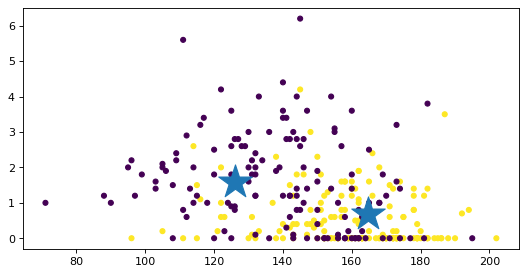

In [73]:
plt.figure(figsize=(8, 4),dpi=80)
plt.scatter(features[:,0], features[:,1],c=outcome, s=20)
plt.scatter(centers[:,0],centers[:,1],marker="*",s=1000)
plt.show()

In [11]:
from sklearn import metrics
metrics.silhouette_score(features,kmeans.labels_, metric='euclidean')

0.5779646262367025

In [58]:
features_new= np.array([[120, 2.3], [130.3, 3.5], [146, 1.2], [160, 0]])
kmeans.predict(features_new)

array([0, 0, 1, 1])

**conclusions:**  
kmeans is a very simple and effective clustering algorithm, which realizes clustering by changing the clustering center of newly added data. Even for a very messy data set like mine, it still has a certain effect.


** **

**bullet 2:**

Hard Clustering vs Soft Clustering:

In [13]:
kmeans.transform(features_new)

array([[ 6.24266447, 44.62935299],
       [ 4.24511827, 34.71459717],
       [23.79998601, 14.60919971],
       [33.83450268,  4.65022666]])

In [14]:
k=2
np.linalg.norm(np.tile(features_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[ 6.24266447, 44.62935299],
       [ 4.24511827, 34.71459717],
       [23.79998601, 14.60919971],
       [33.83450268,  4.65022666]])

**GMM**

In [15]:
from sklearn.mixture import GaussianMixture

In [59]:
gmm=GaussianMixture(n_components=2, random_state=101)
y_pred_gmm = gmm.fit_predict(features)

In [60]:
y_pred_gmm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

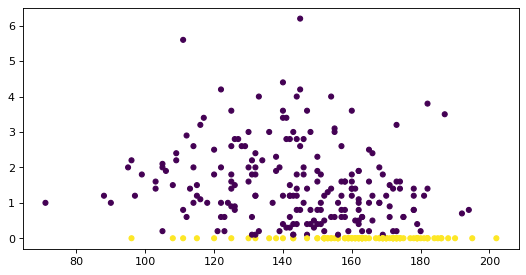

In [61]:
#plt.scatter(features[:, 0], features[:, 1], c=outcome, s=20)
plt.figure(figsize=(8, 4),dpi=80)
plt.scatter(features[:,0], features[:,1],c=y_pred_gmm, s=20)
#plt.scatter(centers_gmm[:,0],centers_gmm[:,1],marker="*",s=1000)
plt.show()

In [62]:
 gmm_labels =gmm.predict(features)

In [43]:
from sklearn import metrics
metrics.silhouette_score(features,gmm_labels, metric='euclidean')

-0.1511400036854486

**conclusions:**
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering.

**bullet 3 & 4:**

KMEANS:

In [44]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


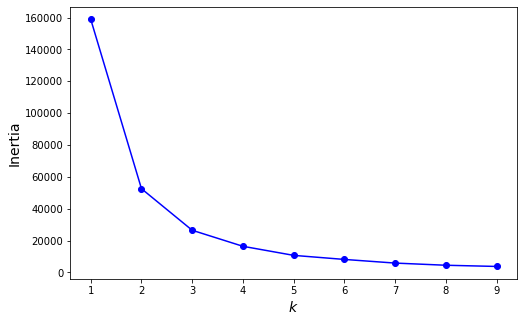

In [45]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

**conclusions:**  
Elbow is at K=2,   
which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half.

GMM:

In [46]:
count =1
for k in range(2, 10):
    gmm=GaussianMixture(n_components=k, random_state=101)
    gmm_labels = gmm.fit_predict(features)
    gmm_score = metrics.silhouette_score(features,gmm_labels, metric='euclidean')
    count=count+1
    print(count , gmm_score)

2 0.10783707557543505
3 -0.03512415013045014
4 0.00739766235054222
5 -0.01819335002294969
6 -0.1511400036854486
7 -0.033444962340008905
8 -0.006245649245335136
9 -0.06286880495939522


**conclusions:**  
The closer the silhouette_score is to 1, the better the result (the more accurate the clustering). The closer to -1, the worse the result. If the value is near 0, the sample is on the boundary of the two clusters.   
so k=2 is the best choose in GMM

**bullet 5：**

In the same data set, Bayesian classification has advantages over the two clustering algorithms I tested.

KMEAN is better than GMM. At least the people who are sick and those who are not sick can be clustered. Of course, this is probably because my data has undergone rough dimensionality reduction processing (for better visualization).

KMEAN has an accuracy of about 57%, while Bayesian classification has an accuracy of 89% (you can see from Part 1)  
GMM only has 11% accuracy